## 時間數列分析 Homework 2, B036060012 政經大四 劉百耀

### Use the same realization of White noise $\varepsilon$'s (set $\sigma{_\varepsilon}^{2}$ = 1) to simulate and plot the following Gaussian process $Y{_t}$ (set $Y{_0}$ = E($Y{_t}$)) in a sample of size T = 50:

(1) $Y{_t} = \varepsilon{_t}$

(2) $Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$

(3) $Y{_t} = \varepsilon{_t} -0.8 \varepsilon{_{t-1}}$

(4) $Y{_t} = 2 + \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$

(5) $Y{_t} = \varepsilon{_t} +1.25 \varepsilon{_{t-1}}$

(6) $Y{_t} = 0.8Y{_{t-1}} + \varepsilon{_t}$

(7) $Y{_t} = -0.8Y{_{t-1}} + \varepsilon{_t}$

(8) $Y{_t} = 2 + 0.8Y{_{t-1}} + \varepsilon{_t}$

(9) $Y{_t} = 1.25Y{_{t-1}} + \varepsilon{_t}$

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Define parameters
mean = 0
std = 1
sample_size = 51    #T
sample_set_num = 3  #how many sample set

In [2]:
# Create random data
columns = ["sample_1", "sample_2", "sample_3"]

sample_set = pd.DataFrame(columns = columns)

#np.random.seed(101)

for i in range(sample_set_num):
    sample_set.iloc[:, i] = np.random.normal(mean, std, sample_size)

### Plot (1) $Y{_t} = \varepsilon{_t}$ with all sample set:

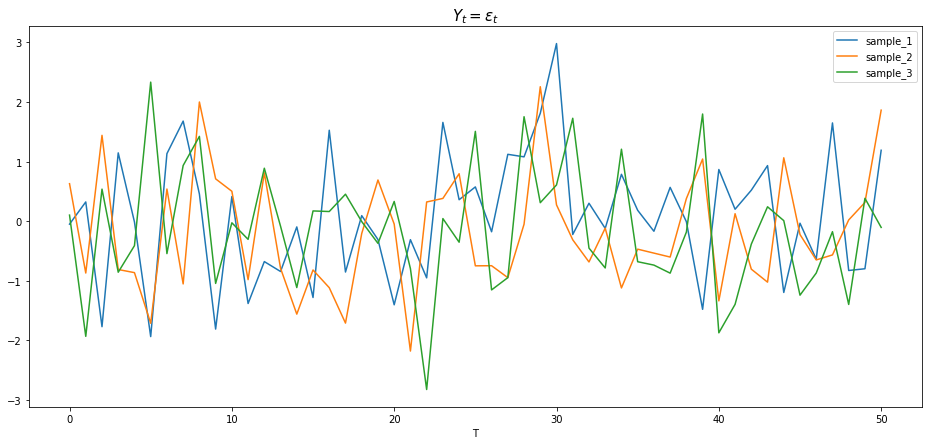

In [3]:
plt.figure(figsize= (16, 7))
for i in range(sample_set_num):
    plt.plot(sample_set.iloc[:, i], label = sample_set.columns[i])
plt.xlabel("T")
plt.title(r"$Y{_t} = \varepsilon{_t}$", fontsize = 15)
plt.legend();

### Plot (2) $Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$ with all sample set:

In [4]:
# Define function to calculate Yt, this function can be used to calculate Yt for Moving Average process
def calculate_Y_t_MA(data, constant, parameter):
    Y_t = data[1:].values + parameter*data[:-1].values + constant
    return(Y_t)

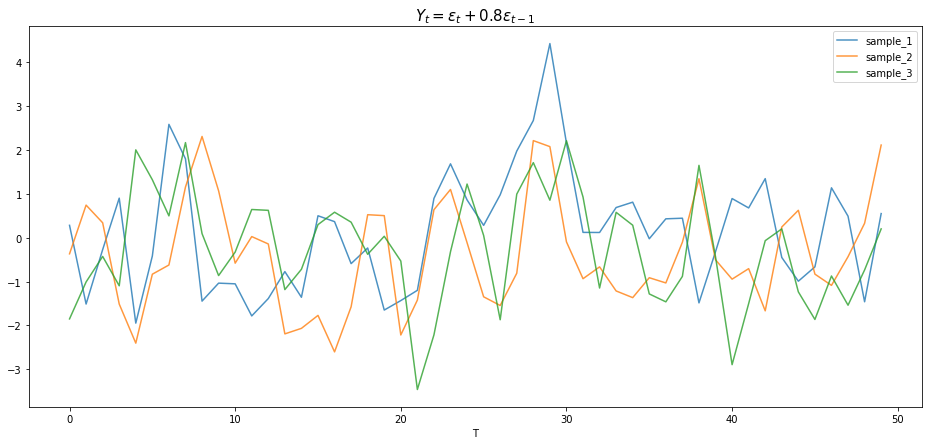

In [5]:
plt.figure(figsize = (16, 7))
for i in range(sample_set_num):
    plt.plot(calculate_Y_t_MA(sample_set.iloc[:, i], 0, 0.8), label = sample_set.columns[i], alpha = 0.8)
plt.xlabel("T")
plt.title(r"$Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$", fontsize = 15)
plt.legend();

### Plot (1) $Y{_t} = \varepsilon{_t}$ and (2) $Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$ with first sample set:

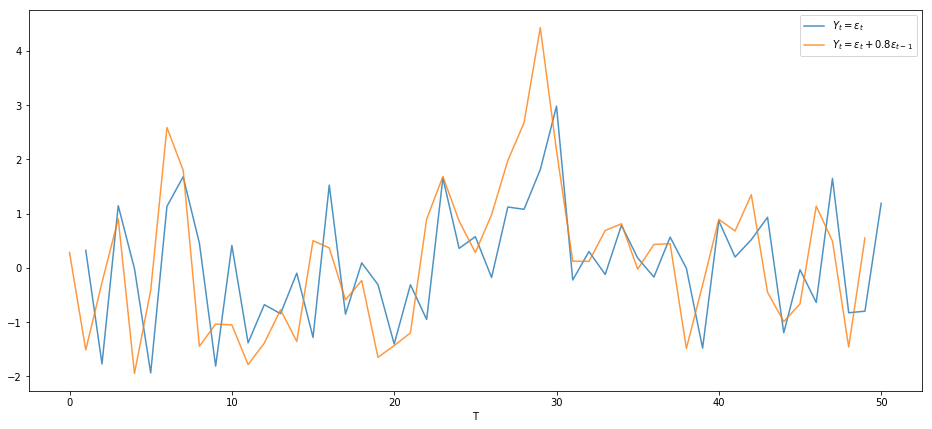

In [6]:
plt.figure(figsize = (16, 7))
plt.plot(sample_set.drop(0, axis = 0).iloc[:, 0], label = r"$Y{_t} = \varepsilon{_t}$", alpha = 0.8)
plt.plot(calculate_Y_t_MA(sample_set.iloc[:, 0], 0, 0.8), label = r"$Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$", alpha = 0.8)
plt.xlabel("T")
plt.legend();

### Plot (2) $Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$, (3) $Y{_t} = \varepsilon{_t} -0.8 \varepsilon{_{t-1}}$, (4) $Y{_t} = 2 + \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$,and (5) $Y{_t} = \varepsilon{_t} +1.25 \varepsilon{_{t-1}}$ with first sample set:

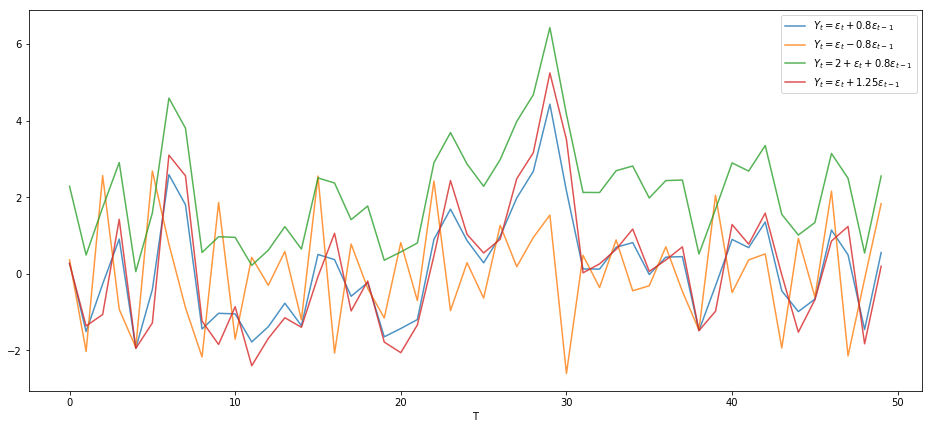

In [7]:
plt.figure(figsize = (16, 7))
plt.plot(calculate_Y_t_MA(sample_set.iloc[:, 0], 0, 0.8), label = r"$Y{_t} = \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$", alpha = 0.8)
plt.plot(calculate_Y_t_MA(sample_set.iloc[:, 0], 0, -0.8), label = r"$Y{_t} = \varepsilon{_t} -0.8 \varepsilon{_{t-1}}$", alpha = 0.8)
plt.plot(calculate_Y_t_MA(sample_set.iloc[:, 0], 2, 0.8), label = r"$Y{_t} = 2 + \varepsilon{_t} +0.8 \varepsilon{_{t-1}}$", alpha = 0.8)
plt.plot(calculate_Y_t_MA(sample_set.iloc[:, 0], 0, 1.25), label = r"$Y{_t} = \varepsilon{_t} +1.25 \varepsilon{_{t-1}}$", alpha = 0.8)
plt.xlabel("T")
plt.legend();

### Plot (6) $Y{_t} = 0.8Y{_{t-1}} + \varepsilon{_t}$, (7) $Y{_t} = -0.8Y{_{t-1}} + \varepsilon{_t}$,and (8) $Y{_t} = 2 + 0.8Y{_{t-1}} + \varepsilon{_t}$ with first sample set:

In [8]:
# Define function to calculate Yt, this function can be used to calculate Yt for Autoregressive process
def calculate_Yt_AR(data, constant, parameter):
    temp = np.zeros(sample_size)
    for i in range(1,(sample_size)):
        if(i == 1):
            temp[i] = parameter * 0 + sample_set.iloc[:, 0][i] + constant
        else:
            temp[i] = parameter * temp[i - 1] + sample_set.iloc[:, 0][i] + constant
    return(temp[1:])

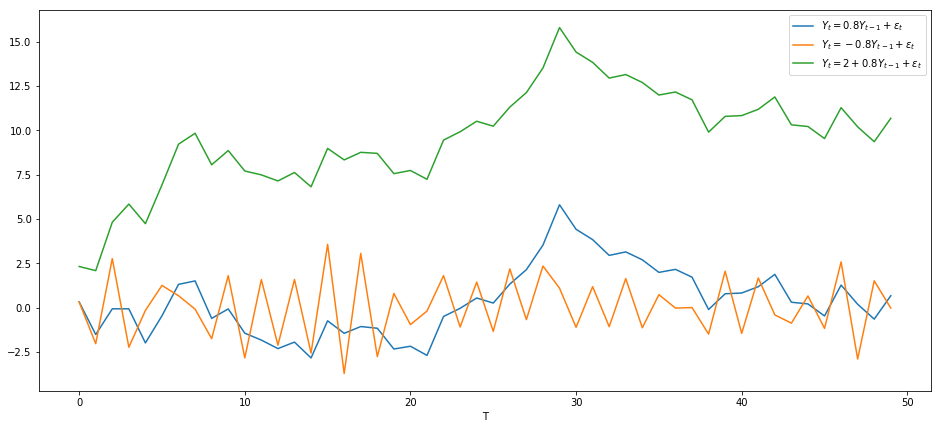

In [9]:
plt.figure(figsize = (16, 7))
plt.plot(calculate_Yt_AR(sample_set.iloc[:, 0], 0, 0.8), label = r"$Y{_t} = 0.8Y{_{t-1}} + \varepsilon{_t}$")
plt.plot(calculate_Yt_AR(sample_set.iloc[:, 0], 0, -0.8), label = r"$Y{_t} = -0.8Y{_{t-1}} + \varepsilon{_t}$")
plt.plot(calculate_Yt_AR(sample_set.iloc[:, 0], 2, 0.8), label = r"$Y{_t} = 2 + 0.8Y{_{t-1}} + \varepsilon{_t}$")
plt.xlabel("T")
plt.legend();

### Plot (9) $Y{_t} = 1.25Y{_{t-1}} + \varepsilon{_t}$ with first sample set:

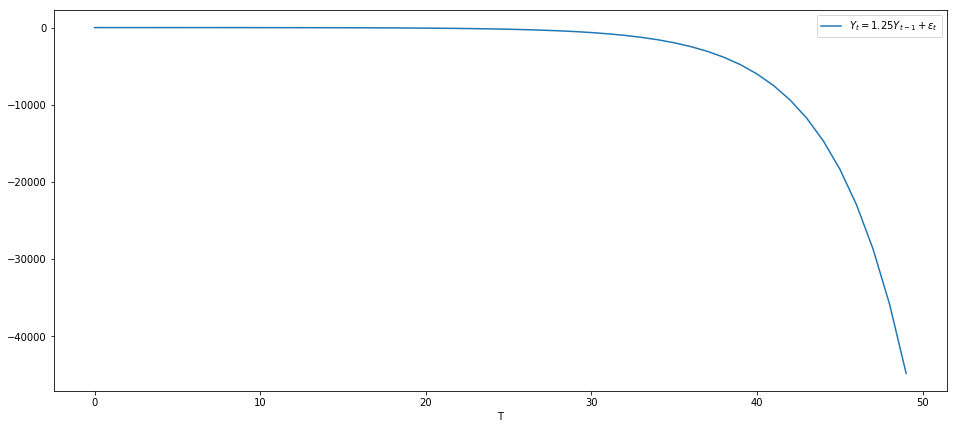

In [10]:
plt.figure(figsize = (16, 7))
plt.plot(calculate_Yt_AR(sample_set.iloc[:, 0], 0, 1.25), label = r"$Y{_t} = 1.25Y{_{t-1}} + \varepsilon{_t}$")
plt.xlabel("T")
plt.legend();